# Mixture Density Network Example

Original Paper: https://publications.aston.ac.uk/id/eprint/373/1/NCRG_94_004.pdf

References: 
- https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb
- https://github.com/tonyduan/mdn/blob/master/mdn/models.py

See `./src/mdn.py` for the actual implementation of the Mixture Density Network model.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal, Categorical
import matplotlib.pyplot as plt

from src import MixtureDensityNetwork

from typing import List

In [2]:
NUM_GAUSSIANS = 4
LAYERS = [1, 32]
LEARNING_RATE = 3e-3
OUTPUT_DIM = 2
NUM_EPOCHS = 5_000

In [3]:
def plot3d(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=y+z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

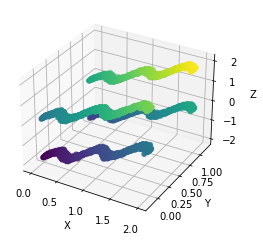

In [4]:
# Generate 3D Training Data
x = torch.linspace(0, 2, 10000)
y = torch.linspace(0, 16, 10000).sin()/10 + torch.randint(0, 2, (10000,)) + torch.randn(10000)/40
z = x + 2*torch.randint(0, 2, (10000,)) - 2 + torch.rand(10000)/40

plot3d(x, y, z)

In [5]:
model = MixtureDensityNetwork(LAYERS, NUM_GAUSSIANS, OUTPUT_DIM).cuda()
opt = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [6]:
inputs = x.unsqueeze(-1).cuda()
targs = torch.cat([y.unsqueeze(-1), z.unsqueeze(-1)], dim=1).cuda()

In [7]:
for epoch_idx in range(NUM_EPOCHS):
    normal_dists, weight_dist = model(inputs)
    
    opt.zero_grad()
    loss = model.loss_func(targs, normal_dists, weight_dist)
    loss.backward()
    opt.step()
    
    if (epoch_idx + 1) % 250 == 0:
        print(f"Epoch {epoch_idx+1} Loss: {loss.item():8.4f}")

Epoch 250 Loss:  -1.7619
Epoch 500 Loss:  -1.8381
Epoch 750 Loss:  -1.8877
Epoch 1000 Loss:  -1.9259
Epoch 1250 Loss:  -2.0400
Epoch 1500 Loss:  -2.3272
Epoch 1750 Loss:  -2.4132
Epoch 2000 Loss:  -2.4995
Epoch 2250 Loss:  -2.5458
Epoch 2500 Loss:  -2.6650
Epoch 2750 Loss:  -2.7270
Epoch 3000 Loss:  -2.7793
Epoch 3250 Loss:  -2.8143
Epoch 3500 Loss:  -2.7991
Epoch 3750 Loss:  -2.8779
Epoch 4000 Loss:  -2.9046
Epoch 4250 Loss:  -2.9247
Epoch 4500 Loss:  -2.9413
Epoch 4750 Loss:  -2.9546
Epoch 5000 Loss:  -2.9693


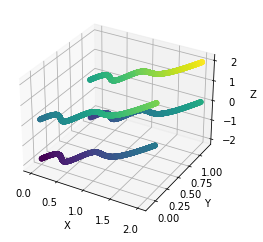

In [8]:
preds = model.sample(inputs)
y_pred = preds.squeeze(1)[:, 0].cpu()
z_pred = preds.squeeze(1)[:, 1].cpu()

plot3d(x, y_pred, z_pred)